<a href="https://colab.research.google.com/github/areeshaj3109/Multiclass-Image-Categorization-Model/blob/main/Multiclass_Image_Categorization_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


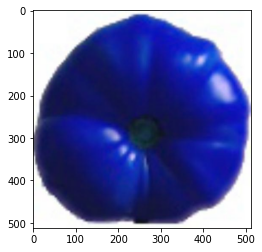

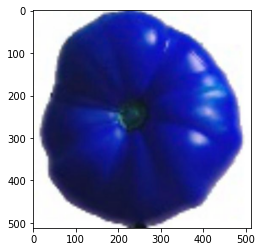

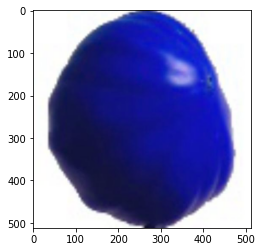

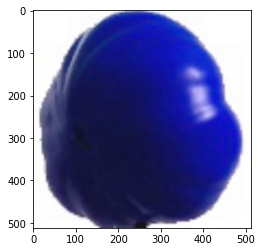

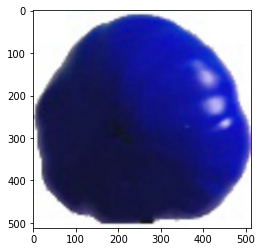

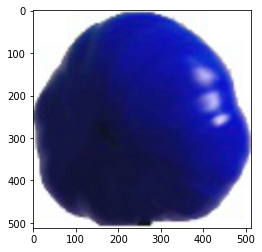

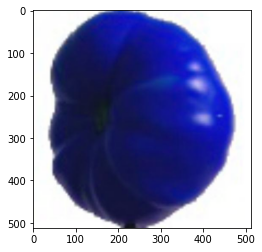

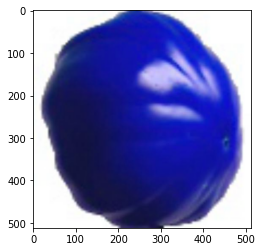

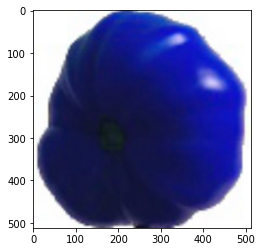

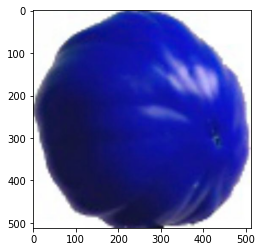

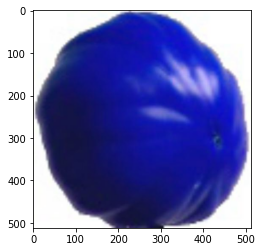

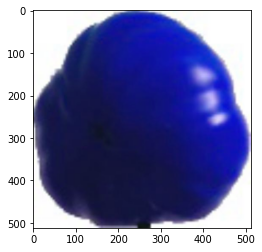

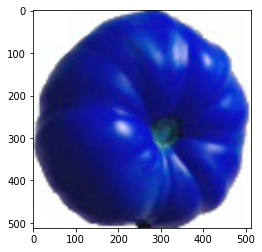

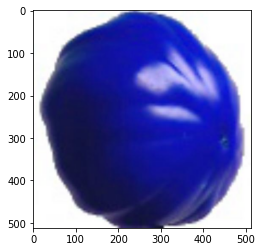

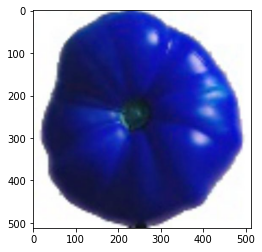

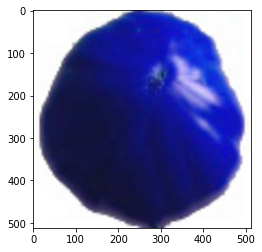

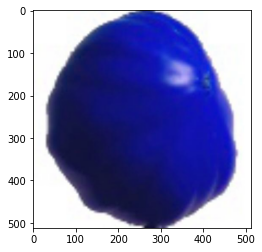

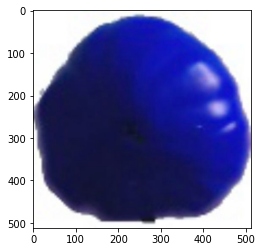

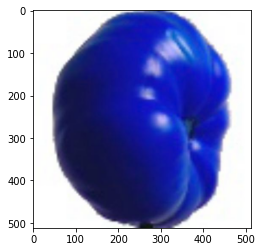

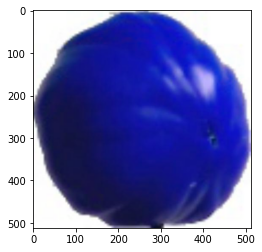

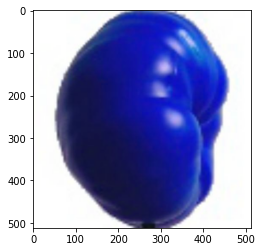

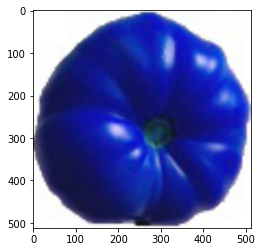

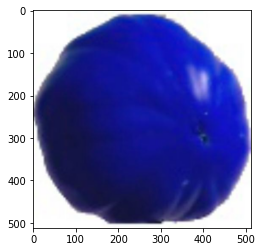

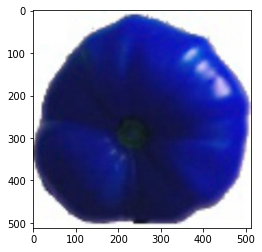

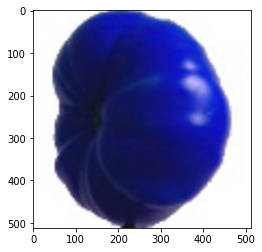

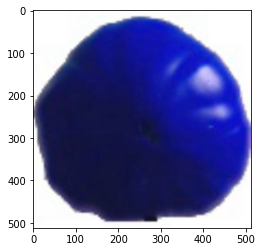

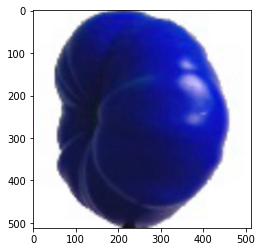

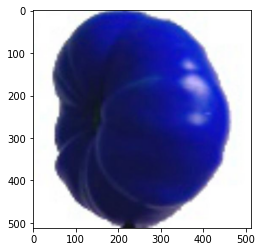

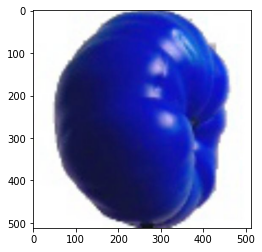

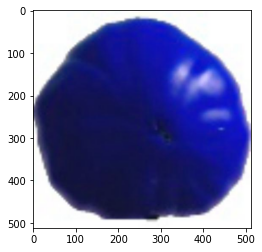

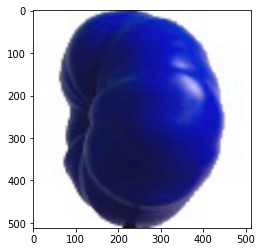

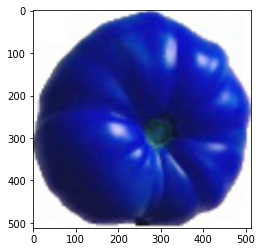

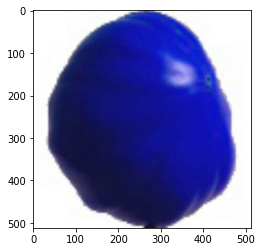

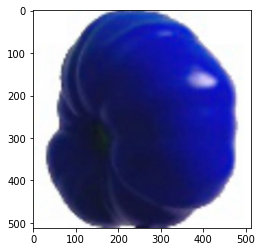

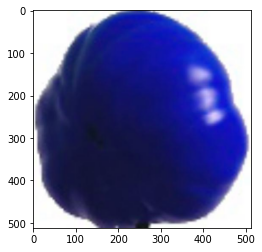

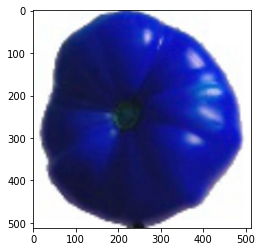

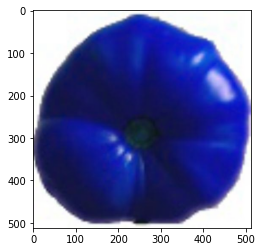

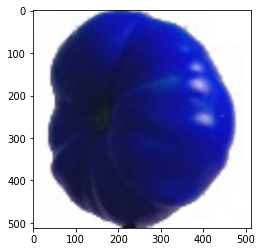

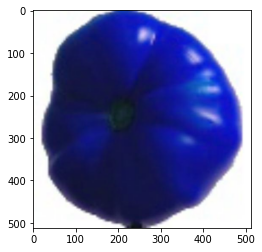

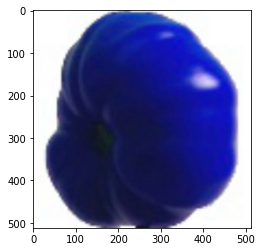

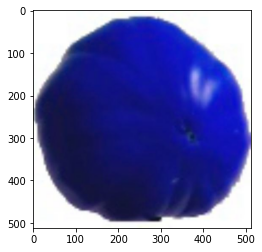

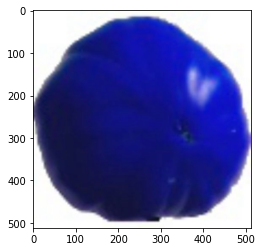

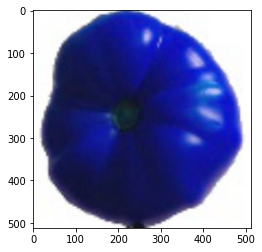

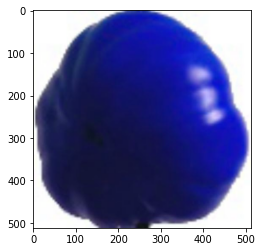

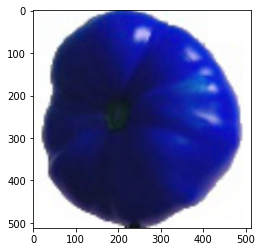

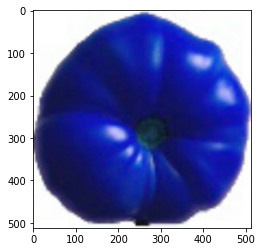

KeyboardInterrupt: ignored

In [ ]:
#https://www.youtube.com/watch?v=j-3vuBynnOE

#pip install opencv-pythonimport tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import os
import cv2

DATADIR = "/content/drive/My Drive/Colab Notebooks/multiclass-image-competition/train/"
CATEGORIES = ["1-Tomato 3", "2-Tomato 4", "3-Tomato Cherry Red", "4-Tomato Maroon", "5-Tomato Yellow", "6-Walnut"]
#CATEGORIES = ["f", "a"]
#CATEGORIES = ["X"]
#CATEGORIES = ["X", "Other"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
            plt.imshow(img_array, cmap="gray")
            plt.show()
        except Exception as e:
            pass


In [ ]:
!ls /content/drive/My\ Drive/Colab\ Notebooks

'Copy of ItoAI_S21_HW4_v4.ipynb'   f_and_a   HW4-18646-Areesha.ipynb   XandO


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

#DATADIR = "./train/"
#CATEGORIES = ["Jibril", "Sulayman"]
#DATADIR = "./XandO/"
#CATEGORIES = ["X", "O"]
#DATADIR = "./kagglecatsanddogs_3367a/PetImages"
#DATADIR = "./kagglecatsanddogs_small/PetImages"
#CATEGORIES = ["Dog", "Cat"]


IMG_SIZE = 100

training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data()
print(len(training_data))

random.shuffle(training_data)

#for sample in training_data:
#    print(sample[1])

X=[]
Y=[]
for features, label in training_data:
    X.append(features)
    Y.append(label)
    
X = np.array(X)
Y = np.array(Y)
X = X/255.0
#print (X)

2330


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pickle

#X=pickle.load(open("X.pickle", "rb"))
#Y = pickle.load(open("Y.pickle","rb"))
#print(X)

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    X, Y, test_size=0.2, random_state=42)
print("X.shape=",X.shape)
print("x_train.shape=",x_train.shape)
print("y_train.shape=",y_train.shape)
print("x_test.shape=",x_test.shape)
print("y_test.shape=",y_test.shape)

callback = EarlyStopping(monitor='val_loss', patience=5)
# This callback will stop the training when there is no improvement in
# the validation loss for five consecutive epochs.



X.shape= (2330, 100, 100, 3)
x_train.shape= (1864, 100, 100, 3)
y_train.shape= (1864,)
x_test.shape= (466, 100, 100, 3)
y_test.shape= (466,)


In [ ]:
model = Sequential()

model.add(Conv2D(14,(3,3),input_shape=X.shape[1:]))
#model.add(Conv2D(7,(3,3),input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(14,(3,3)))
#model.add(Conv2D(7,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(0.2))
model.add(Dense(6))
model.add(Activation('softmax'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
#model.fit(x_train, y_train,batch_size=32,epochs=500,callbacks=[callback],validation_data=(x_test,y_test))
model.fit(x_train, y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test),verbose=2)


Epoch 1/10
59/59 - 13s - loss: 0.2239 - accuracy: 0.9286 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 2/10
59/59 - 12s - loss: 0.0107 - accuracy: 0.9979 - val_loss: 3.5471e-04 - val_accuracy: 1.0000
Epoch 3/10
59/59 - 12s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.6619e-04 - val_accuracy: 1.0000
Epoch 4/10
59/59 - 12s - loss: 3.6145e-04 - accuracy: 1.0000 - val_loss: 9.9040e-05 - val_accuracy: 1.0000
Epoch 5/10
59/59 - 12s - loss: 5.2415e-04 - accuracy: 1.0000 - val_loss: 1.5038e-04 - val_accuracy: 1.0000
Epoch 6/10
59/59 - 12s - loss: 0.0079 - accuracy: 0.9984 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/10
59/59 - 12s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.3381e-05 - val_accuracy: 1.0000
Epoch 8/10
59/59 - 12s - loss: 1.0382e-04 - accuracy: 1.0000 - val_loss: 1.2483e-05 - val_accuracy: 1.0000
Epoch 9/10
59/59 - 12s - loss: 6.4017e-05 - accuracy: 1.0000 - val_loss: 8.6107e-06 - val_accuracy: 1.0000
Epoch 10/10
59/59 - 12s - loss: 6.2402e-05 - accuracy: 1.0000 - v

In [ ]:
DATADIR = "/content/drive/My Drive/Colab Notebooks/multiclass-image-competition/test/"
IMG_SIZE = 100

training_data = []

path = os.path.join(DATADIR)

File = open("/content/drive/My Drive/Colab Notebooks/PredictFile.csv", "w")
File.write("filename,category")
File.write("\n")

for img in os.listdir(path):
    try:
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        new_array = new_array.reshape(-1,IMG_SIZE,IMG_SIZE,3)
        m = model.predict(new_array)
        print(m)
        File.write(img + ',' + str(np.argmax(m)+1))
        File.write("\n")
        print(img + ',' + str(np.argmax(m)+1))
    except Exception as e:
        pass

File.close()

[[0. 0. 1. 0. 0. 0.]]
375ca28ef504fcd7a7d39ce7016283d26fb6ccd8595ca3b9a7da63e13c81df5c.jpg,3
[[0. 0. 1. 0. 0. 0.]]
3a93b7dd61425135cafe17b4f1400ac56183878a45582c2d01f92488831beed8.jpg,3
[[0. 1. 0. 0. 0. 0.]]
2e5a10a7a4b3e07b1cd00ec7459202f25fb47de9540c4f9e3b75325e953c5bbe.jpg,2
[[0. 1. 0. 0. 0. 0.]]
45443793516a2790b982ad73d624558f1890173113a48c8363353687bf658bc8.jpg,2
[[1. 0. 0. 0. 0. 0.]]
13b3afe3db9f4b2e7330cfe760e8540f817e3c137d09aa0eb5189ddda2d75c4c.jpg,1
[[1. 0. 0. 0. 0. 0.]]
12f4744ed9eb2b959bb08b1c25faf483ea56b78997eb944768b28f2a8a77f0e2.jpg,1
[[1. 0. 0. 0. 0. 0.]]
40f60ab4eacf90f7fe477f8079107e0eae80ab82b194a94a530d69e0195e38e9.jpg,1
[[0. 0. 1. 0. 0. 0.]]
285ea440b29c02d00c1aa9caaa5618615fe575b27b29f4fa64e49a0e2356a325.jpg,3
[[0. 0. 1. 0. 0. 0.]]
435ef25e503fb893b978b7f644b1a2e373bfa6d0082f5f0caf4aa06a1b9554e0.jpg,3
[[0. 1. 0. 0. 0. 0.]]
2e4a47685f87281ee99a882c10bc082c3e6a190e0c9be085154433a97242cb4a.jpg,2
[[0. 0. 0. 0. 1. 0.]]
27a348eba9e9691f04816cb309d2c811971f93a4612f0a30